<a href="https://colab.research.google.com/github/arogya-gyawali/brainscan_AI/blob/main/notebooks/data_prep/05_stratified_split_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 01_stratified_split_metadata.ipynb — Stratified Train/Val/Test Split

This notebook performs a **stratified split** on the cleaned metadata of MRI scans, ensuring balanced class distribution across training, validation, and test sets.

---

## 🎯 Goals

- Split the dataset into train/val/test in **70/15/15** ratio
- Preserve class balance across:
  - no_tumor
  - glioma
  - meningioma
  - pituitary
- Save splits as CSV files for downstream modeling

---

## 🧾 Inputs

- `final_merged_metadata_cleaned.csv`
  - 📍 Location:
    `/content/drive/MyDrive/BrainScanAI/BrainScanAI_final_output/metadatas_tumor_and_no_tumor/`

---

## 📤 Outputs

- `train.csv`
- `val.csv`
- `test.csv`

Each file includes:
- `file`, `label`, `label_name`, `has_mask`, `source`, `slice_index`

---

## 📊 Validation

Includes:
- Per-class barplots for each split
- Visual confirmation of class balance across splits

---

✅ Done on: **Cleaned metadata with 4,807 samples**  
🔁 Reproducible with `random_state=42`


In [1]:
# Mount Drive and import libraries
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Update this if needed
csv_path = "/content/drive/MyDrive/BrainScanAI/BrainScanAI_final_output/metadatas_tumor_and_no_tumor/final_merged_metadata_cleaned.csv"
output_path = "/content/drive/MyDrive/BrainScanAI/splits"
os.makedirs(output_path, exist_ok=True)


# Load metadata
df = pd.read_csv(csv_path)

# Only keep useful columns
df = df[["file", "label", "label_name", "source", "has_mask", "slice_index"]]

# === Stratified split ===
train_df, temp_df = train_test_split(
    df, test_size=0.30, stratify=df["label"], random_state=42
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42
)

# === Save each split ===
train_df.to_csv(os.path.join(output_path, "train.csv"), index=False)
val_df.to_csv(os.path.join(output_path, "val.csv"), index=False)
test_df.to_csv(os.path.join(output_path, "test.csv"), index=False)

print(f"✅ Train: {len(train_df)}")
print(f"✅ Val: {len(val_df)}")
print(f"✅ Test: {len(test_df)}")


✅ Train: 3364
✅ Val: 721
✅ Test: 722


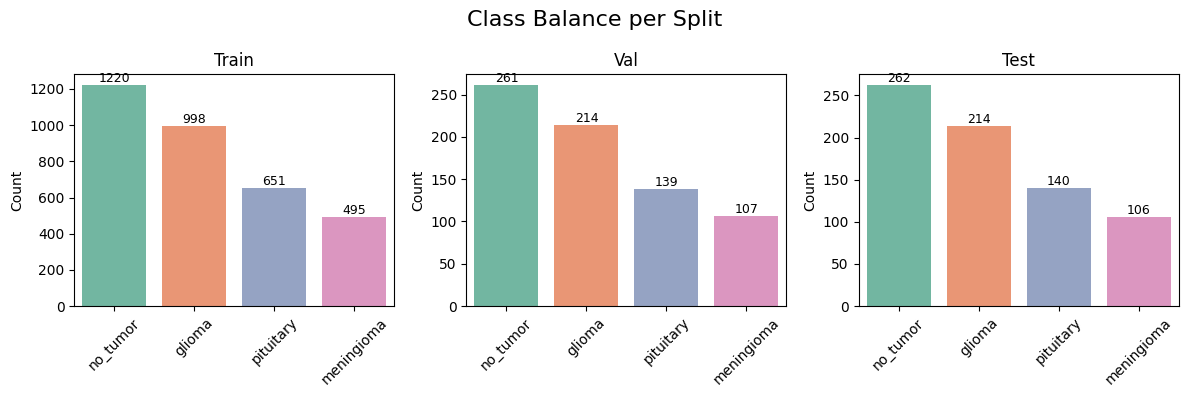

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define label order and consistent color map
label_order = ["no_tumor", "glioma", "pituitary", "meningioma"]
palette = sns.color_palette("Set2", n_colors=4)
color_map = dict(zip(label_order, palette))

plt.figure(figsize=(12, 4))

for i, (name, subset) in enumerate(zip(["Train", "Val", "Test"], [train_df, val_df, test_df])):
    plt.subplot(1, 3, i + 1)
    ax = sns.countplot(
        data=subset, x="label_name", hue="label_name",
        order=label_order, palette=color_map, legend=False
    )

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(name)
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.suptitle("Class Balance per Split", fontsize=16)
plt.tight_layout()
plt.show()
